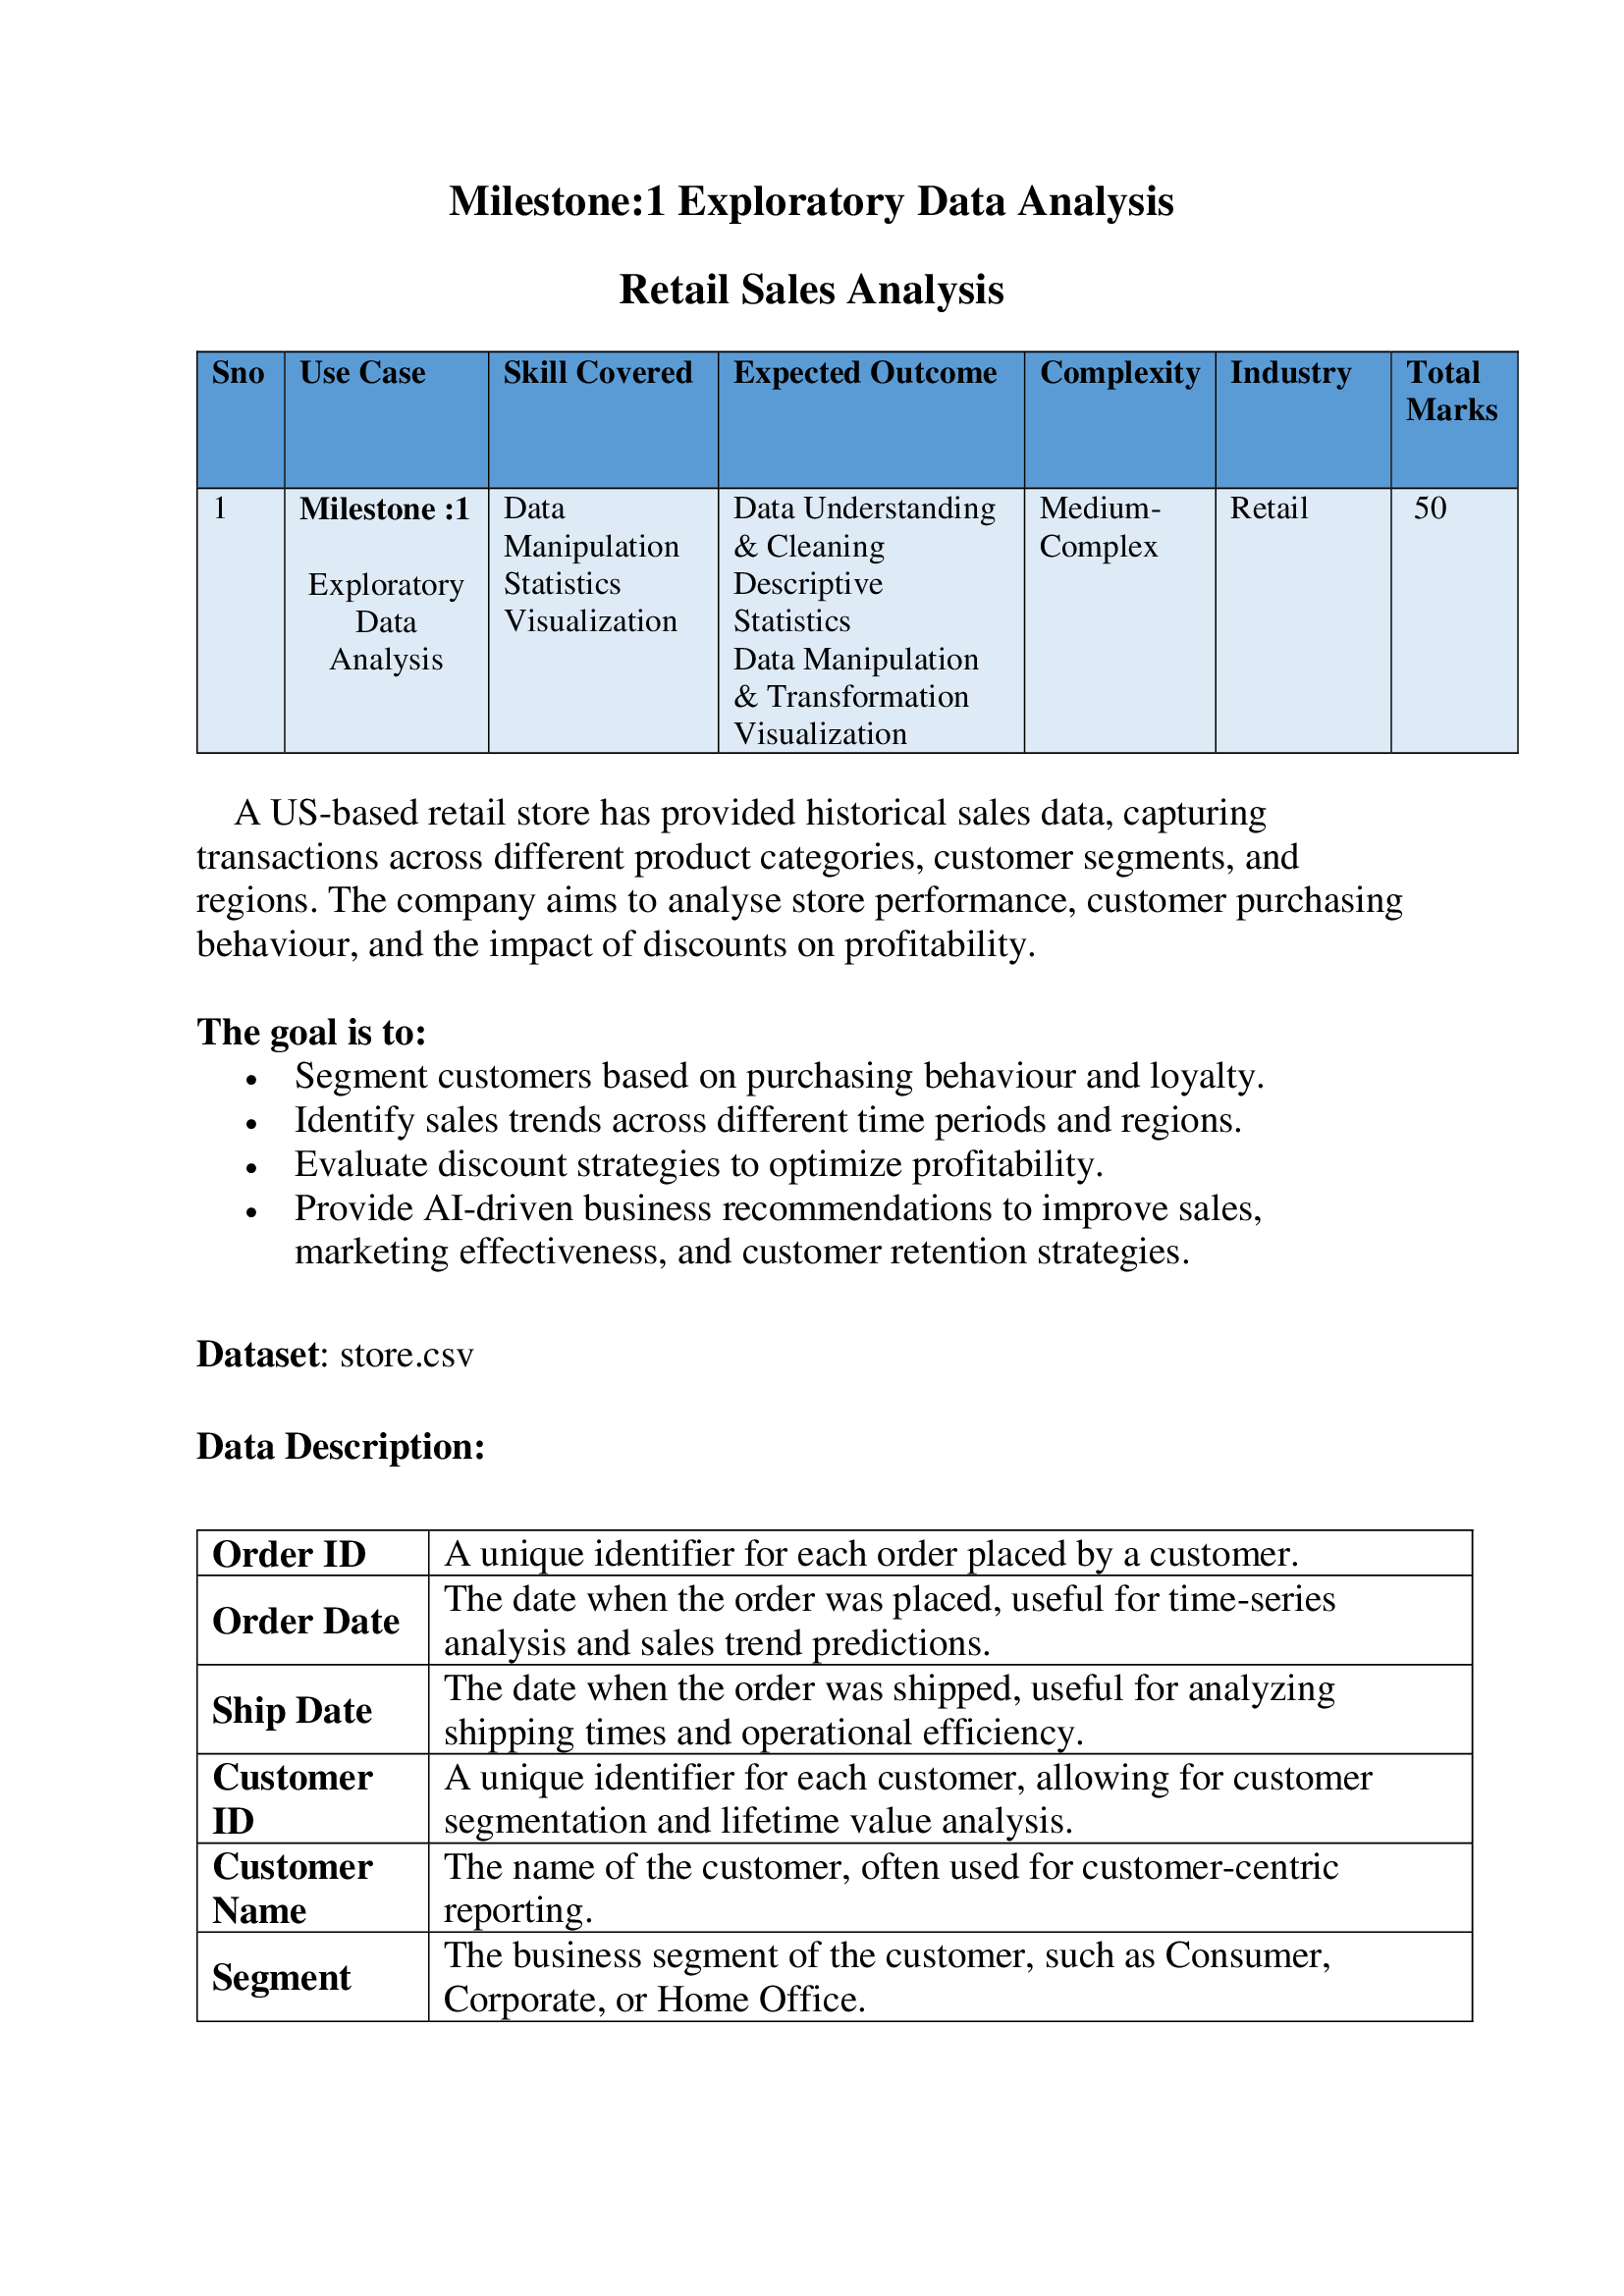

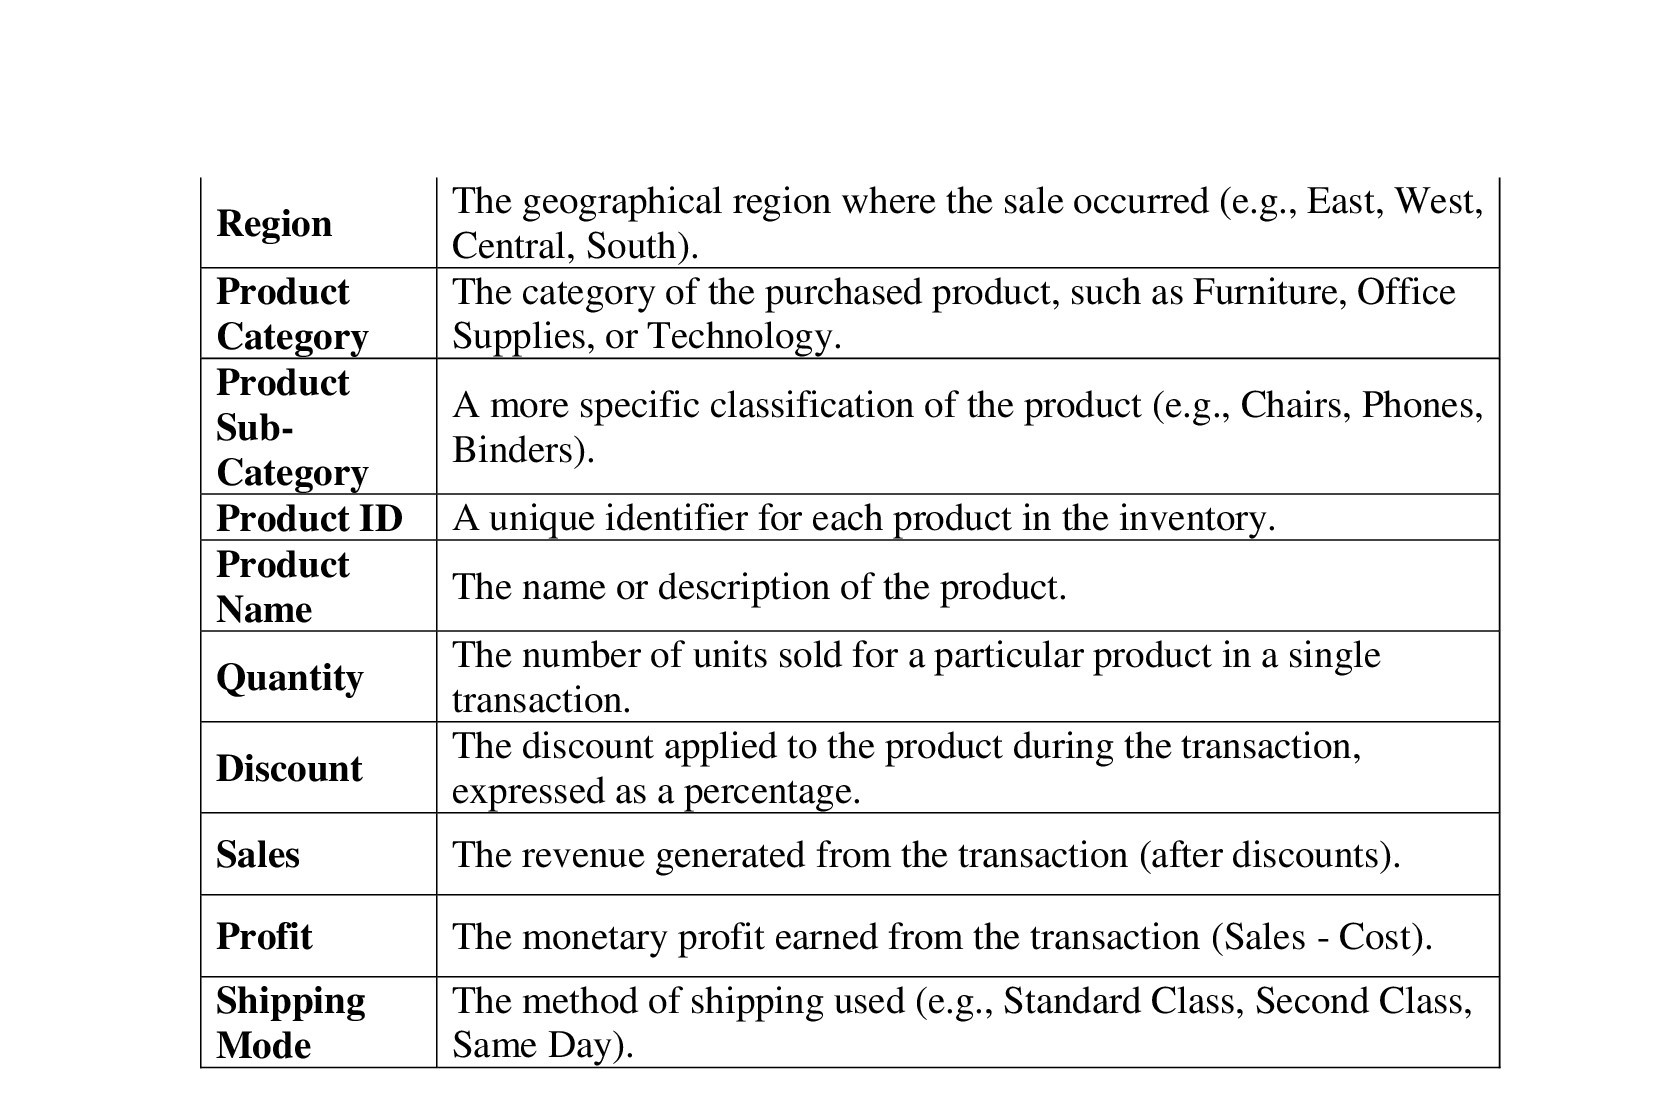

**Initial Guidelines:**

Ensure to follow to Use Id’s provided by UNext for naming file as conventions. 

Create GitHub account and submit the GitHub link. 

**General Instructions**

- The assessment has 15 questions, each question is a separate function
- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments # code starts here and # code ends here
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- The kernel of the Jupyter notebook is to be set as Python 3 (ipykernel) if not set already
- Include imports as necessary

**Import various libraries and modules used in data analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import numpy as np

**Task 1: Load the dataset and perform preliminary EDA (Exploratory Data Analysis) with key observations and insights- (weightage - 40 marks)**

#### T1.1 Load the sales dataset.  (weightage - 2marks)   AE 

#### NOTE:
The `read_csv` method in Pandas allows you to read csv files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.

In [6]:
def load_the_dataset(dataset_location):
    store = None
    # code starts here
    # add encoding='latin'argument when loading the data
    try:
         store= pd.read_csv(dataset_location,encoding='latin')
    except :
        return "File not found. Please check the file path."
    # code ends here
    return store     

In [7]:
# store the result of the dataset
dataset_location = 'Store.csv'
store=load_the_dataset(dataset_location)
print(store)

      Unnamed: 0  Row ID        Order ID  Order Date   Ship Date  \
0              0       1  CA-2013-152156  11-09-2013  11-12-2013   
1              1       2  CA-2013-152156  11-09-2013  11-12-2013   
2              2       3  CA-2013-138688   6/13/2013   6/17/2013   
3              3       4  US-2012-108966  10-11-2012  10/18/2012   
4              4       5  US-2012-108966  10-11-2012  10/18/2012   
...          ...     ...             ...         ...         ...   
9989        9989    9990  CA-2011-110422   1/22/2011   1/24/2011   
9990        9990    9991  CA-2014-121258   2/27/2014  03-04-2014   
9991        9991    9992  CA-2014-121258   2/27/2014  03-04-2014   
9992        9992    9993  CA-2014-121258   2/27/2014  03-04-2014   
9993        9993    9994  CA-2014-119914  05-05-2014  05-10-2014   

           Ship Mode Customer ID     Customer Name    Segment        Country  \
0       Second Class    CG-12520       Claire Gute   Consumer  United States   
1       Second Class   

#### T1.2 (i) Count duplicate rows and remove them. 
#### (ii) Find unique values in "Customer Segment", "Ship Mode", "Product Category"(weightage - 2marks)      AE 

In [8]:
def process_store_data(df):
    """ code starts here
    Reads a CSV file, removes duplicate rows
    """
    # Count duplicate rows
    duplicate_count = df.duplicated().sum()

    # Remove duplicate rows
    df= df.drop_duplicates()
    # code ends here
    return duplicate_count,df.head()

In [9]:
process_store_data(store)

(0,
    Unnamed: 0  Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
 0           0       1  CA-2013-152156  11-09-2013  11-12-2013    Second Class   
 1           1       2  CA-2013-152156  11-09-2013  11-12-2013    Second Class   
 2           2       3  CA-2013-138688   6/13/2013   6/17/2013    Second Class   
 3           3       4  US-2012-108966  10-11-2012  10/18/2012  Standard Class   
 4           4       5  US-2012-108966  10-11-2012  10/18/2012  Standard Class   
 
   Customer ID    Customer Name    Segment        Country  ... Postal Code  \
 0    CG-12520      Claire Gute   Consumer  United States  ...       42420   
 1    CG-12520      Claire Gute   Consumer  United States  ...       42420   
 2    DV-13045  Darrin Van Huff  Corporate  United States  ...       90036   
 3    SO-20335   Sean O'Donnell   Consumer  United States  ...       33311   
 4    SO-20335   Sean O'Donnell   Consumer  United States  ...       33311   
 
   Region       Product ID      

(ii) Find unique values in "Customer Segment", "Ship Mode", "Product Category"(weightage - 2marks)      AE 

- Note: Output is in dictionary format. Keys are variable name, values are list of unique levels

In [10]:
def find_unique_values(df):
    #code starts here
    
    unique_values = {
        "Customer Segment": df["Segment"].unique().tolist(),
        "Ship Mode": df["Ship Mode"].unique().tolist(),
        "Product Category": df["Category"].unique().tolist(),
    }
    # code ends here
    return unique_values


In [11]:
# Call the function
find_unique_values(store)

{'Customer Segment': ['Consumer', 'Corporate', 'Home Office'],
 'Ship Mode': ['Second Class', 'Standard Class', 'First Class', 'Same Day'],
 'Product Category': ['Furniture', 'Office Supplies', 'Technology']}

#### T1.3 Overall Sales Performance: 

- (i) What is the total sales volume (Total Amount) over the entire dataset period? 
- (ii) How do total sales vary by month, quarter, or year? Are there any missing values in the data? If yes, handle the missing values by using appropriate technique. 
- (iii) What is the distribution of Sales?       (weightage - 3marks)  AE 

In [12]:
def total_sales(df, amount_column):
    # code starts here
    total=df[amount_column].sum()
    #code ends here
    return total

In [13]:
total_sales(store, 'Sales')

2297200.8603000003

#### (ii) Are there any missing values in the data? If yes, handle the missing values by using appropriate technique

- Note: output in percentage format

In [14]:
def check_missing_values(df):
    
   # Check for missing values
    missing_values = df.isnull().sum()/len(df)*100
    return missing_values


In [15]:
check_missing_values(store)

Unnamed: 0       0.0
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

#### (iii) What is the distribution of Sales?
- Note: Output in numerical value

In [16]:
def sales_distribution(df):
    #code starts here
    
    sales_dist=df["Sales"].describe()
    
    # code ends here
    return sales_dist


In [17]:
sales_distribution(store)

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

### T1.4 Customer Segmentation: 

- (i)Which customer segment (Consumer, Corporate, Home Office) contributes the most to total sales and profits? 
- (ii) How does customer purchasing behaviour vary across different regions? 
- (iii) Which regions have the highest number of high-spending customers? (weightage –3marks)   AE

#### (i) Which customer segment (Consumer, Corporate, Home Office) contributes the most to total sales and profits?

In [18]:
def top_customer_segment(df):
    """
    Identifies the customer segment (Consumer, Corporate, Home Office) that contributes 
    the most to total sales and profits.
    """
    # code starts here
    segment_sales_profit = df.groupby("Segment",as_index=False)[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False)
    
    #code ends here
    return segment_sales_profit



In [19]:
top_customer_segment(store)

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


####  (ii) How does customer purchasing behaviour vary across different regions? 

In [20]:
def regional_purchasing_behavior(df):
    """
    Shows total sales and average order value for each region.
    """
    #code starts here
    cust_purchase_behavior= df.groupby("Region",as_index=False)[["Sales"]].agg(["sum", "mean"]).sort_values(by=("Sales", "sum"), ascending=False)
    #code ends here
    return cust_purchase_behavior

In [21]:
regional_purchasing_behavior(store)

Region        Sales            
                    sum        mean
3     West  725457.8245  226.493233
1     East  678781.2400  238.336110
0  Central  501239.8908  215.772661
2    South  391721.9050  241.803645

In [22]:
def high_spending_regions(df, threshold=5000):
    """
    Identifies regions with the highest number of high-spending customers.
    A high-spending customer is defined as one whose total sales exceed the threshold.
    """
    #code starts here
    high_spending_customers = df.groupby(["Region", "Customer ID"])["Sales"].sum().reset_index()
    high_spending_customers = high_spending_customers[high_spending_customers["Sales"] > threshold]
    
    # Use nunique() on "Customer ID" to count unique high spenders in each region.
    region_high_spenders = high_spending_customers.groupby("Region")["Customer ID"].nunique().sort_values(ascending=False).reset_index()
    
    # code ends here
    return region_high_spenders


In [23]:
high_spending_regions(store, threshold=5000)

,Region,Customer ID
0,East,17
1,West,12
2,Central,10
3,South,7


### T1.5. Product Category Analysis: 

- (i)Which Product Categories are most popular in terms of quantity sold and total sales revenue? 
- (ii) What is the average quantity purchased per transaction for each product category? (weightage –2marks)   AE 

#### (i) Which Product Categories are most popular in terms of quantity sold and total sales revenue? 

In [24]:
def popular_product_categories(df):
    """Finds the most popular product categories based on quantity sold and total sales."""
    
    # code starts here
    popular_product=df.groupby("Category",as_index=False)[["Quantity", "Sales"]].sum().sort_values(by="Sales", ascending=False)
    #code ends here
    
    return popular_product

In [25]:
popular_product_categories(store)

,Category,Quantity,Sales
2,Technology,6939,836154.0330
0,Furniture,8028,741999.7953
1,Office Supplies,22906,719047.0320


#### (ii) What is the average quantity purchased per transaction for each product category?

In [26]:
def avg_quantity_per_transaction(df):
    
    """Finds the average quantity purchased per transaction for each product category."""
    #code starts here
    avg_qty=df.groupby("Category")["Quantity"].mean().reset_index()
    
    #code ends here
    return avg_qty

In [27]:
avg_quantity_per_transaction(store)

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


### T1.6 Product Preferences & Purchasing Behavior: 
- (i) What is the relationship between Quantity and Sales? 
- (ii) Are there any common trends or patterns in Quantity and Sales for specific Product Categories? 
- (iii) Which customer segments generate the highest profits? 

#### (i) What is the relationship between Quantity and Sales? 
- Note: output in three decimals

In [28]:
def quantity_sales_relationship(df):
    
    """Finds the correlation between Quantity and Sales."""
    
    #code starts here
    qty_sales=round(df["Quantity"].corr(df["Sales"]),3)
    
    #code ends here
    return qty_sales

In [29]:
quantity_sales_relationship(store)

0.201

#### (ii) Are there any common trends or patterns in Quantity and Sales for specific Product Categories? 

In [30]:
def category_quantity_sales_trends(df):
    """Finds total Quantity and Sales for each Product Category."""
    
    #code starts here
    
    category_qty_sales=df.groupby("Category",as_index=False)[["Quantity", "Sales"]].sum().sort_values(by="Sales", ascending=False)
    #code ends here
    return category_qty_sales


In [31]:
category_quantity_sales_trends(store)

,Category,Quantity,Sales
2,Technology,6939,836154.0330
0,Furniture,8028,741999.7953
1,Office Supplies,22906,719047.0320


#### (iii) Which customer segments generate the highest profits? 

In [32]:
def highest_profit_segments(df):
    """Finds which customer segments generate the highest profits."""
    #code starts here
    profit_segments=df.groupby("Segment")["Profit"].sum().sort_values(ascending=False).reset_index()
    #code ends here
    return profit_segments


In [33]:
highest_profit_segments(store)

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


### T1.7 Calculate new metrics 
- Shipping time: Ship Date - Order Date to get delivery time. 
- Discounted Price: Sales - (Sales * Discount) to determine the actual price after applying the discount.
- Revenue per Day: Sales / Shipping Time to estimate how much revenue is generated per day of shipping.     (weightage –3marks)           AE

#### Shipping time: Ship Date - Order Date to get delivery time.

In [34]:
def clean_and_calculate_shipping_time(df):
    """
    Cleans the date format and calculates shipping time.

    Args:
    df (DataFrame): Input DataFrame containing 'Order Date' and 'Ship Date'.

    Returns:
    DataFrame: Updated DataFrame with cleaned date formats and calculated shipping time.
    """
     
    # code starts here
    # Convert date columns to datetime format, handling different formats
   
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
    df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")
    
    # Drop rows with missing dates to avoid NaN values
    df = df.dropna(subset=["Order Date", "Ship Date"])
    
    # Compute shipping time in days
    #df.loc[:, "Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days.astype(int)
    df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
    
    # code ends here
    return df['Shipping Time']


In [35]:
clean_and_calculate_shipping_time(store)


C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_24084\1066977208.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Shipping Time"] = (df["Ship Date"] - df["Order Date"]).dt.days


0       3
1       3
13      5
35      2
36      2
       ..
9978    4
9979    4
9980    3
9981    3
9993    5
Name: Shipping Time, Length: 2650, dtype: int64

#### Discounted Price: Sales - (Sales * Discount) to determine the actual price after applying the discount.

In [36]:
def calculate_discounted_price(df):
    """
    Calculates discounted price as Sales - (Sales * Discount).
    """
    df["Discounted Price"] = df["Sales"] - (df["Sales"] * df["Discount"])
    return df['Discounted Price']

In [37]:
calculate_discounted_price(store)

0       261.960000
1       731.940000
2        14.620000
3       526.667625
4        17.894400
           ...    
9989     20.198400
9990     91.960000
9991    206.860800
9992     29.600000
9993    243.160000
Name: Discounted Price, Length: 9994, dtype: float64

#### Revenue per Day: Sales / Shipping Time to estimate how much revenue is generated per day of shipping.

In [45]:
def calculate_revenue_per_day(df):
    """
    Calculates total revenue per day by grouping sales data by Order Date.

    - Revenue is calculated as Sales (which includes Quantity * Price).
    - Revenue per day is obtained by summing sales for each Order Date.
    """
    # code starts here
    # Aggregate Revenue per Day
    daily_revenue = df.groupby("Order Date")["Sales"].sum().reset_index()
    #rename 'Sales' into 'Revenue'
    daily_revenue=daily_revenue.rename(columns={"Sales":"Revenue_per_day"})
    
    # Display only 2 columns Order Date and Revenue_per_day . Save it in df_new
    df_new=daily_revenue[['Order Date','Revenue_per_day']]
    
    #code ends here
    return df_new

In [46]:
calculate_revenue_per_day(store)

,Order Date,Revenue_per_day
0,2011-01-04,16.448
1,2011-01-05,288.060
2,2011-01-06,19.536
3,2011-01-07,4407.100
4,2011-01-08,87.158
...,...,...
479,2014-12-08,2916.514
480,2014-12-09,7643.041
481,2014-12-10,5470.390
482,2014-12-11,3873.559


#### T1.8 Identify Most Discounted Products
- Find the top 10 products with the highest discount applied.  (weightage –2marks)  AE

In [209]:
def identify_most_discounted_products(df, top_n=10):
    """
    Identifies the top N products with the highest discount applied.
    """
    #code starts here
    top_n=df.nlargest(top_n, "Discount")[['Product Name']]
    #code ends here
    return top_n

In [210]:
identify_most_discounted_products(store)

,Product Name
14,Holmes Replacement Filter for HEPA Air Cleaner...
15,Storex DuraTech Recycled Plastic Frosted Binders
75,Economy Binders
101,Avery Hidden Tab Dividers for Binding Systems
169,Kensington 7 Outlet MasterPiece Power Center
174,Kensington 7 Outlet MasterPiece HOMEOFFICE Pow...
176,"Acco 7-Outlet Masterpiece Power Center, Wihtou..."
203,Eureka Sanitaire Commercial Upright
261,Eureka Disposable Bags for Sanitaire Vibra Gro...
280,Round Ring Binders


#### t1.9 Analyze Revenue Efficiency
- Determine the top 5 orders with the highest "Revenue per Day".    (weightage –2marks)  AE

In [211]:
def analyze_revenue_efficiency(df, top_n=5):
    """
    Determines the top N orders with the highest "Revenue per Day".
    """
    #code starts here
    rev_eff=df.nlargest(top_n, 'Revenue_per_day')[['Revenue_per_day']]
    #code ends here
    return rev_eff

In [212]:
analyze_revenue_efficiency(calculate_revenue_per_day(store))

,Revenue per Day
8488,4374.975000
6014,4158.912000
6826,2499.992857
4218,2399.992000
353,2177.584000


### T1.19 Visualization: 
- (i)Plot a sales distribution histogram.
- (ii) Create a bar chart showing sales by customer segment.
- (iii)Plot a line chart of total sales over time (monthly or yearly trends).
- (iv) Compare order count trends over time.  (weightage - 4 marks)                     ME


In [213]:
def plot_sales_distribution(df):
    """
    Plots a histogram to show the sales distribution.

    Args:
    df (DataFrame): Input DataFrame containing 'Sales' column.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Sales"], bins=30, kde=True)
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.title("Sales Distribution Histogram")
    plt.show()

def plot_sales_by_segment(df):
    """
    Creates a bar chart showing total sales by customer segment.

    Args:
    df (DataFrame): Input DataFrame containing 'Segment' and 'Sales' columns.
    """
    plt.figure(figsize=(8, 5))
    segment_sales = df.groupby("Segment")["Sales"].sum().reset_index()
    sns.barplot(x="Segment", y="Sales", data=segment_sales, palette="viridis")
    plt.xlabel("Customer Segment")
    plt.ylabel("Total Sales")
    plt.title("Sales by Customer Segment")
    plt.xticks(rotation=45)
    plt.show()

def plot_sales_trend(df, freq='M'):
    """
    Plots a line chart of total sales over time.

    Args:
    df (DataFrame): Input DataFrame containing 'Order Date' and 'Sales' columns.
    freq (str): Frequency for resampling ('M' for monthly, 'Y' for yearly).
    """
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    sales_trend = df.resample(freq, on="Order Date")["Sales"].sum()
    
    plt.figure(figsize=(10, 5))
    sales_trend.plot(marker="o", linestyle="-", color="b")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.title(f"Total Sales Trend ({'Monthly' if freq == 'M' else 'Yearly'})")
    plt.grid()
    plt.show()

def plot_order_count_trend(df, freq='M'):
    """
    Compares order count trends over time.

    Args:
    df (DataFrame): Input DataFrame containing 'Order Date' column.
    freq (str): Frequency for resampling ('M' for monthly, 'Y' for yearly).
    """
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    order_count = df.resample(freq, on="Order Date").size()
    
    plt.figure(figsize=(10, 5))
    order_count.plot(marker="o", linestyle="-", color="r")
    plt.xlabel("Date")
    plt.ylabel("Order Count")
    plt.title(f"Order Count Trend ({'Monthly' if freq == 'M' else 'Yearly'})")
    plt.grid()
    plt.show()


C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


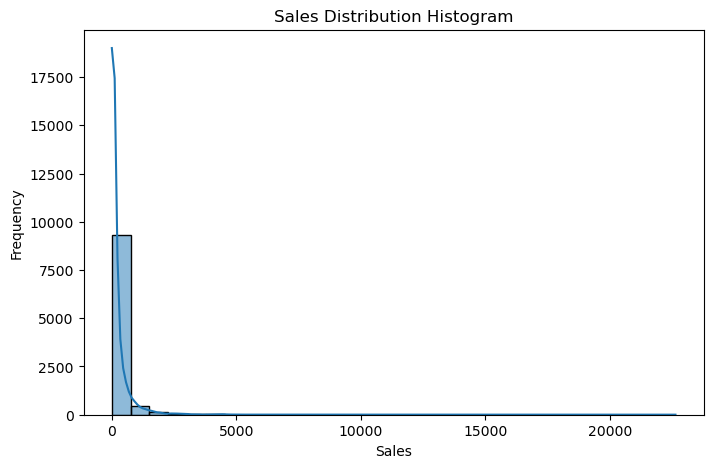

In [214]:
plot_sales_distribution(store)

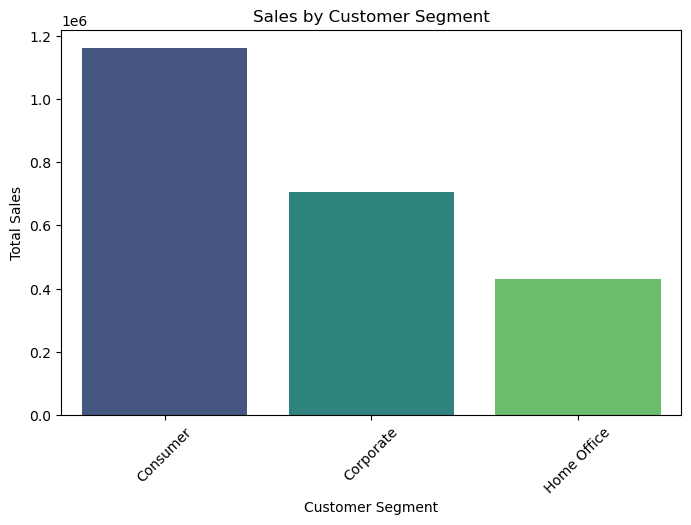

In [215]:
plot_sales_by_segment(store)

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_16688\4123218195.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = df.resample(freq, on="Order Date")["Sales"].sum()


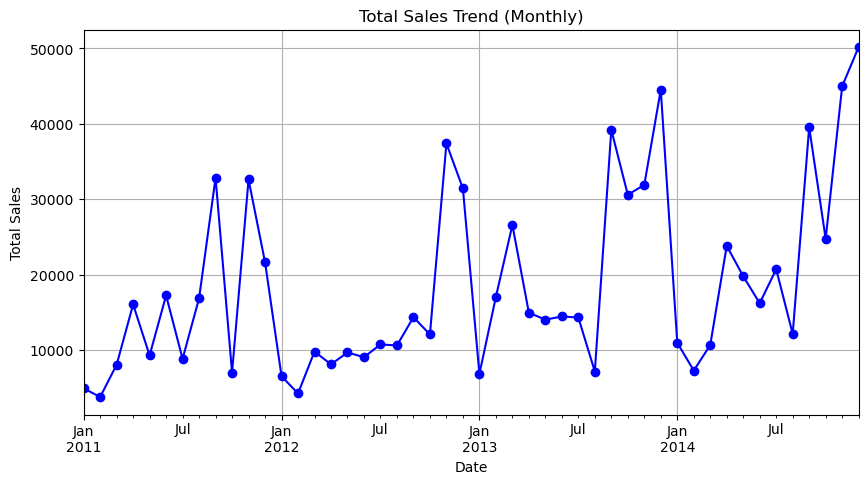

In [216]:
plot_sales_trend(store, freq='M')  # Monthly sales trend

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_16688\4123218195.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_count = df.resample(freq, on="Order Date").size()


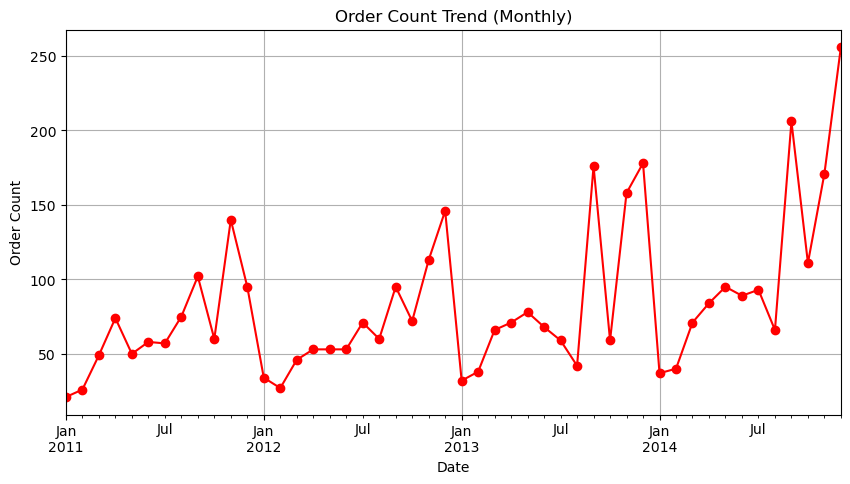

In [217]:
plot_order_count_trend(store, freq='M')  # Monthly order count trend

### T1.11 Validate Hypotheses 
- (i)Is there a significant difference in the average sales across product categories? Apply ANOVA. 
- (ii) Is there a significant difference in sales performance between Consumer and Corporate Segments? Apply an independent samples t-test. 
- (iii) Is there a relationship between product category and Region? Apply the chi-square test.  (weightage - 6marks)    AE

**(i)Is there a significant difference in the average sales across product categories? Apply ANOVA.**

- If yes,print :"There is a significant difference in the average sales across different product categories"

- If no, print: There is no significant difference in the average sales across different product categories"

In [218]:
def anova_sales_by_category(df):
    """
    Performs ANOVA to test if there is a significant difference in average sales across product categories.

    Args:
    df (DataFrame): Input DataFrame containing 'Category' and 'Sales' columns.

    Returns:
    float: ANOVA p-value
    """
    categories = df["Category"].unique()
    sales_data = [df[df["Category"] == category]["Sales"] for category in categories]
    
    f_stat, p_value = stats.f_oneway(*sales_data)
    
    # Compare p-value with significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        result1 = "There is a significant difference in the average sales across different product categories"
    else:
        result1 = "There is no significant difference in the average sales across different product categories"
    # Code ends here
    
    return result1


In [219]:
anova_sales_by_category(store)

'There is a significant difference in the average sales across different product categories'

**- (ii) Is there a significant difference in sales performance between Consumer and Corporate Segments? Apply an independent samples t-test.**

- If yes,print :"There is a significant difference in the sales performance between Consumer and Corporate Segments"

- If no, print: There is no significant difference in the sales performance between Consumer and Corporate Segments"

In [220]:
def ttest_sales_by_segment(df):
    """
    Performs an independent samples t-test to check if sales differ significantly between Consumer and Corporate segments.

    Args:
    df (DataFrame): Input DataFrame containing 'Segment' and 'Sales' columns.

    Returns:
    float: T-test p-value
    """
    consumer_sales = df[df["Segment"] == "Consumer"]["Sales"]
    corporate_sales = df[df["Segment"] == "Corporate"]["Sales"]
    
    t_stat, p_value = stats.ttest_ind(consumer_sales, corporate_sales, equal_var=False)  # Welch’s t-test
   
 # Compare p-value with significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        result2 = "There is a significant difference in the sales performance between Consumer and Corporate Segments"
    else:
        result2 = "There is no significant difference in the sales performance between Consumer and Corporate Segments"
    # Code ends here
    
    return result2


In [221]:
ttest_sales_by_segment(store)

'There is no significant difference in the sales performance between Consumer and Corporate Segments'

**- (iii) Is there a relationship between product category and region? Apply the chi-square test.**

- If yes,print :"There is a relationship between category and region"
- If no, print: "There is no relationship between category and region"

In [222]:
def chi_square_category_region(df):
    """
    Performs a chi-square test to check the relationship between Product Category and Region.

    Args:
    df (DataFrame): Input DataFrame containing 'Category' and 'Region' columns.

    Returns:
    float: Chi-square p-value
    """
    # code starts here
    contingency_table = pd.crosstab(df["Category"], df["Region"])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
     # Compare p-value with significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        result3 = "There is a relationship between category and region"
    else:
        result3 = "There is no relationship between category and region"
    # Code ends here
    
    return result3


In [223]:
chi_square_category_region(store)

'There is no relationship between category and region'

### T1.12 Detect Outliers in the data and do outlier treatment.  (weightage –2marks) AE
- Plot a boxplot to visualize outliers in the data. (weightage –1mark) ME

#### NOTE:
The `sns.boxplot()` function in Seaborn is used to create a box plot visualization, which is a convenient way to visually summarize the distribution of numerical data and identify outliers. Using this detect the outliers in the `store` dataframe. 

<Axes: >

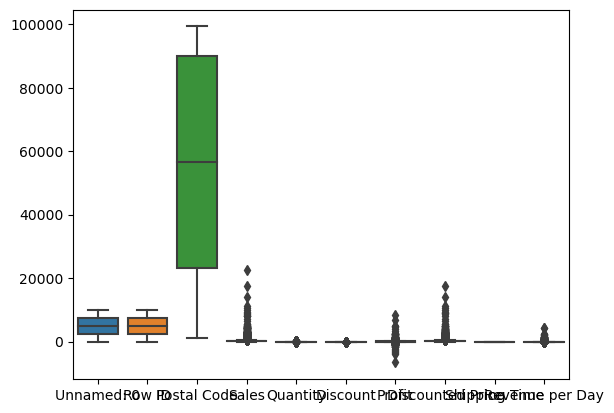

In [224]:
# plot a boxplot to visualize outliers in the data
sns.boxplot(store)

#### NOTE:
The outliers in the dataset can be treated using the Interquartile Range (IQR) method. It replaces the outliers with either the median or the mean, based on the specified treatment method. Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) of the data along with the lower and upper bounds for outliers. Then replace the outliers with the median of the data.

In [225]:
# Define a function to detect and treat outliers using IQR method
def treat_outliers_iqr(data,treatment='median'):
    #code starts here
    threshold=1.5
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    
    if treatment == 'median':
        data[(data < lower_bound) | (data > upper_bound)] = data.median()
    elif treatment == 'mean':
        data[(data < lower_bound) | (data > upper_bound)] = data.mean()
    
    #code ends here
    return data

In [226]:
# Detect outliers and treat them with median value

# code starts here
# select numeric_columns which has outliers

numeric_columns=['Quantity', 'Discount','Profit', 'Discounted Price']

def apply_outlier_treatment(df, numeric_columns, treatment="median"):
    """
    Applies outlier treatment to all numeric columns in the DataFrame.

    Args:
    df (pd.DataFrame): The input DataFrame.
    numeric_columns (list): List of numeric column names.
    treatment (str): The method for handling outliers ("remove", "median", "clip").

    Returns:
    pd.DataFrame: DataFrame with treated outliers.
    """
    for column in numeric_columns:
        df[column] = treat_outliers_iqr(df[column], treatment)
    
    return df.head()

In [227]:
apply_outlier_treatment(store, numeric_columns, treatment="median")

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_16688\875056489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()
C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_16688\875056489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data < lower_bound) | (data > upper_bound)] = data.median()
C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_16688\875056489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Discounted Price,Shipping Time,Revenue per Day
0,0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.9600,3.0,87.32
1,1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,8.6665,45.9232,3.0,243.98
2,2,3,CA-2013-138688,NaT,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,14.6200,NaN,0.00
3,3,4,US-2012-108966,2012-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,8.6665,45.9232,NaN,0.00
4,4,5,US-2012-108966,2012-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,17.8944,NaN,0.00


### T1.13 Analyse the relationships between different variables: Create a correlation matrix and visualize it using a heatmap.   (weightage - 1mark)  AE & ME

- Note: Sorted correlation values with the target column.

In [228]:
def compute_correlations(df, target_column="Sales"):
    """
    Computes the correlation of numerical features with the target variable.

    Args:
    df (DataFrame): The input DataFrame.
    target_column (str): The target variable (default is "Sales").

    Returns:
    DataFrame: Sorted correlation values with the target column.
    """
    #code starts here
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])  
    correlation_matrix = numeric_df.corr()
    
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)
    
        
    #code ends here
    return target_correlation

In [229]:
compute_correlations(store)

<IPython.core.display.Javascript object>

Sales               1.000000
Revenue per Day     0.398715
Quantity            0.181810
Discounted Price    0.106544
Discount            0.045577
Profit              0.041054
Unnamed: 0         -0.001359
Row ID             -0.001359
Shipping Time      -0.008963
Postal Code        -0.023854
Name: Sales, dtype: float64

In [230]:
def plot_correlation_heatmap(df):
    """
    Plots a heatmap to visualize the correlation between numerical variables.

    Args:
    df (DataFrame): The input DataFrame.
    """
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()


<IPython.core.display.Javascript object>

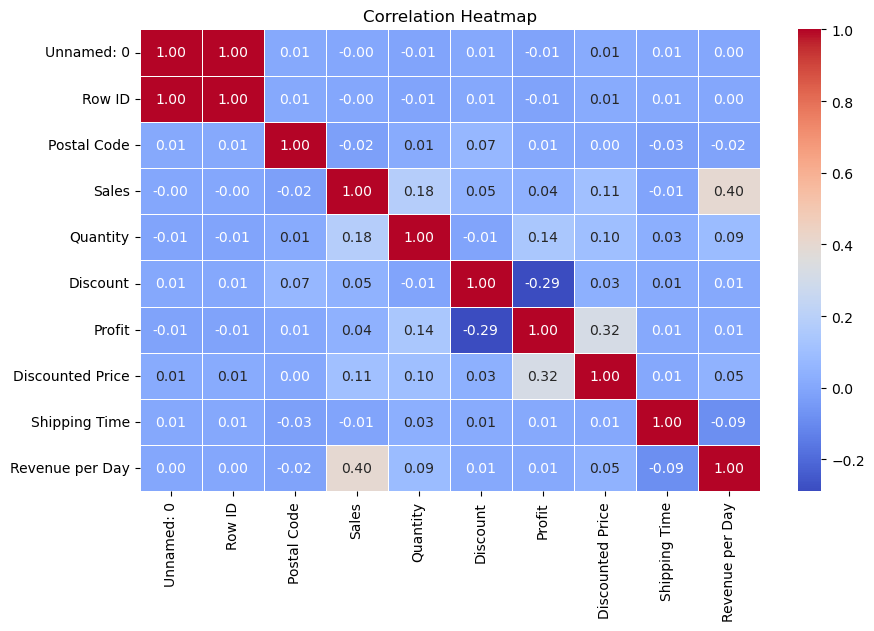

In [231]:
plot_correlation_heatmap(store)

### T1.14 Data Transformation:  remove the unnecessary variable for model building process ['Unnamed: 0', 'Row ID', 'Order ID','Customer ID','Product ID','Customer Name','Product Name']     (weightage - 2marks)             AE

- Apply normalization technique (standard scaler).

In [232]:
# drop the given variables
def drop_var1(data):
    # Code starts here
    data.drop(['Unnamed: 0', 'Row ID', 'Order ID','Customer ID','Product ID','Customer Name','Product Name'],axis=1, inplace=True)
    # Code ends here
    return data

In [233]:
store=drop_var1(store)

In [234]:
store.columns


Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Discounted Price', 'Shipping Time', 'Revenue per Day'],
      dtype='object')

In [235]:
def normalize_numeric_columns(data, scale_columns):
    """
    Applies StandardScaler normalization to selected numeric columns.

    Args:
    data (DataFrame): The input DataFrame.
    scale_columns (list): List of numeric columns to normalize.

    Returns:
    DataFrame: DataFrame with normalized numeric columns.
    """
    #code starts here
    
    scaler = StandardScaler()
    data[scale_columns] = scaler.fit_transform(data[scale_columns])
    
    #code ends here
    return data[scale_columns]

In [236]:
numerical_columns = ['Quantity', 'Discount', 'Profit', 'Discounted Price']
normalize_numeric_columns(store,numerical_columns)

,Quantity,Discount,Profit,Discounted Price
0,-0.836591,-0.969877,1.833343,2.030382
1,-0.327339,-0.969877,-0.141660,-0.320936
2,-0.836591,-0.969877,-0.248295,-0.661636
3,0.691163,2.935456,-0.141660,-0.320936
4,-0.836591,0.765827,-0.506999,-0.625998
...,...,...,...,...
9989,-0.327339,0.765827,-0.412761,-0.600922
9990,-0.836591,-0.969877,0.272188,0.180123
9991,-0.836591,0.765827,0.495546,1.430689
9992,0.181912,-0.969877,0.134776,-0.498596


### T1.15 Handling categorical features: Apply encoding technique to convert categorical variable into numerical.              (weightage - 2marks)                AE

In [239]:
def one_hot_encode(df, categorical_columns):
    """
    Applies One-Hot Encoding to specified categorical columns.

    Args:
    df (DataFrame): The input DataFrame.
    categorical_columns (list): List of categorical columns to encode.

    Returns:
    DataFrame: DataFrame with one-hot encoded categorical variables.
    """
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # Drop first to avoid multicollinearity
    return df_encoded


In [238]:
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
one_hot_encode(store,categorical_columns)


,Order Date,Ship Date,Postal Code,Product Name,Sales,Quantity,Discount,Profit,Discounted Price,Shipping Time,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2013-11-09,2013-11-12,42420,Bush Somerset Collection Bookcase,261.9600,-0.836591,-0.969877,1.833343,2.030382,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2013-11-09,2013-11-12,42420,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,-0.327339,-0.969877,-0.141660,-0.320936,3.0,...,False,False,False,False,False,False,False,False,False,False
2,NaT,NaT,90036,Self-Adhesive Address Labels for Typewriters b...,14.6200,-0.836591,-0.969877,-0.248295,-0.661636,NaN,...,False,False,False,True,False,False,False,False,False,False
3,2012-10-11,NaT,33311,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.691163,2.935456,-0.141660,-0.320936,NaN,...,False,False,False,False,False,False,False,False,False,True
4,2012-10-11,NaT,33311,Eldon Fold 'N Roll Cart System,22.3680,-0.836591,0.765827,-0.506999,-0.625998,NaN,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,NaT,NaT,33180,Ultra Door Pull Handle,25.2480,-0.327339,0.765827,-0.412761,-0.600922,NaN,...,False,False,True,False,False,False,False,False,False,False
9990,NaT,2014-03-04,92627,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,-0.836591,-0.969877,0.272188,0.180123,NaN,...,False,False,True,False,False,False,False,False,False,False
9991,NaT,2014-03-04,92627,Aastra 57i VoIP phone,258.5760,-0.836591,0.765827,0.495546,1.430689,NaN,...,False,False,False,False,False,False,True,False,False,False
9992,NaT,2014-03-04,92627,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,0.181912,-0.969877,0.134776,-0.498596,NaN,...,False,False,False,False,False,True,False,False,False,False


#### **All the Best** 